# Zain Ul Haq zh05616@st.habib.edu.pk

In [4]:
import pandas as pd
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline 

In [5]:
data = pd.read_csv("C:\\Users\\LINK TRADERS LT\\Desktop\\DS_Fall2023\\DS_zh05616_hw3\\loan_small.csv")

In [6]:
data.loc[:,'term'] = data['term'].str.replace("months","")

In [7]:
data.loc[:,'emp_length'] = data['emp_length'].str.replace("+","")
data.loc[:,'emp_length'] = data['emp_length'].str.replace("<","")
data.loc[:,'emp_length'] = data['emp_length'].str.replace("years","")
data.loc[:,'emp_length'] = data['emp_length'].str.replace("year","")




In [8]:
data['emp_length'] = data['emp_length'].astype(str).astype(float)

In [9]:
data['emp_length']

0      10.0
1       1.0
2      10.0
3      10.0
4       1.0
       ... 
994     5.0
995     3.0
996     2.0
997    10.0
998    10.0
Name: emp_length, Length: 999, dtype: float64

In [10]:
data['mths_since_last_delinq']=data['mths_since_last_delinq'].fillna(data['mths_since_last_delinq'].mean())

In [11]:
data['mths_since_last_record']=data['mths_since_last_record'].fillna(data['mths_since_last_record'].mean())

In [12]:
data.loc[:,'loan_status'] = data['loan_status'].str.replace("Fully Paid","Good")
data.loc[:,'loan_status'] = data['loan_status'].str.replace("Current","Good")
data.loc[:,'loan_status'] = data['loan_status'].str.replace("Charged Off","Bad")
data.loc[:,'loan_status'] = data['loan_status'].str.replace("Late (31-120 days)","Bad")
data.loc[:,'loan_status'] = data['loan_status'].str.replace("Default","Bad")


In [13]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing}).round(2).sort_values(by='percent_missing',ascending=False).reset_index(drop=True)
missing_value_df

,column_name,percent_missing
0,emp_title,5.11
1,emp_length,1.70
2,last_pymnt_d,0.10
3,id,0.00
4,out_prncp_inv,0.00
5,mths_since_last_record,0.00
6,open_acc,0.00
7,pub_rec,0.00
8,revol_bal,0.00
9,revol_util,0.00


In [14]:
data = data.dropna() 

In [15]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing}).round(2).sort_values(by='percent_missing',ascending=False).reset_index(drop=True)
missing_value_df

,column_name,percent_missing
0,id,0.0
1,out_prncp_inv,0.0
2,mths_since_last_delinq,0.0
3,mths_since_last_record,0.0
4,open_acc,0.0
5,pub_rec,0.0
6,revol_bal,0.0
7,revol_util,0.0
8,total_acc,0.0
9,initial_list_status,0.0


# Following data cleaning, I verified the presence of any empty rows and calculated the corresponding percentage. Given that the majority of the columns consisted of numerical values filled with their respective means, I proceeded to eliminate the remaining rows with missing data from specific columns. This decision was based on the fact that their missing percentage was below 6%, rendering them less significant for analysis.

In [16]:
data['purpose'].describe()

count                    947
unique                    12
top       debt_consolidation
freq                     508
Name: purpose, dtype: object

In [17]:
data['loan_amnt'].describe()

count      947.000000
mean     12882.233369
std       7455.397090
min       1000.000000
25%       7200.000000
50%      12000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [18]:
data['term'].describe()

count      947
unique       2
top        36 
freq       684
Name: term, dtype: object

In [19]:
data['addr_state'].describe()

count     947
unique     42
top        CA
freq      194
Name: addr_state, dtype: object

# As evident from the data, the predominant loan purpose was debt consolidation. On average, individuals borrowed approximately $12,800 and repaid it over a 36-month period, as opposed to a 60-month repayment term. There were solely two choices for loan repayment durations: 36 or 60 months. Loan amounts ranged from $1,000 to $35,000, with 75% of borrowers opting for loans under $17,000. The dataset encompassed 12 distinct loan request categories, with debt consolidation accounting for 508 out of 947 total requests.

In [20]:
grph = data['addr_state'].value_counts().nlargest(20)

<Axes: xlabel='addr_state'>

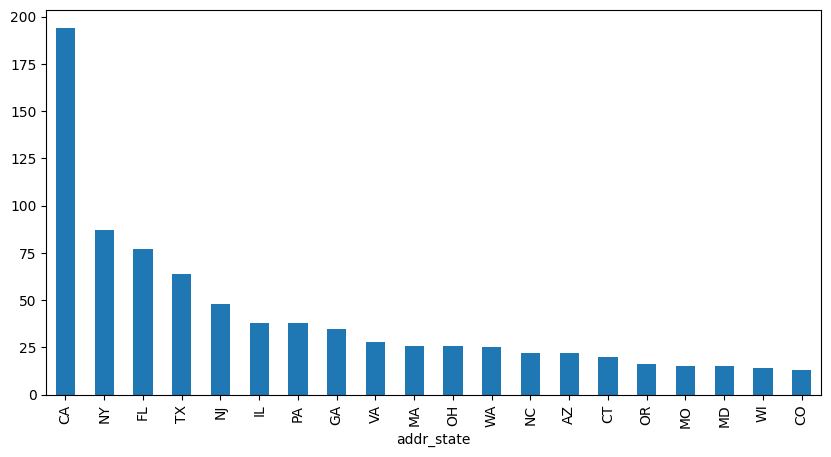

In [21]:
grph.plot(kind='bar', figsize=(10,5))

# The bar graph displayed above illustrates the loan amounts taken by residents of specific American states, focusing on the top 20 states. California emerges as the state with the highest loan uptake, followed by New York, Florida, and so forth. Notably, California records approximately 190-195 loans, while the lowest loan activity is observed in Colorado, with around 20 loans. It's worth noting that California, being a large state with a comparatively high cost of living, sees a substantial number of loans as residents seek to maintain their quality of life. Interestingly, there is a sharp decline in loan frequency after California, even though New York is renowned for its high cost of living. When we consider the cost of living in the last six states, it becomes apparent that it is relatively lower, which explains the similar and comparatively lower loan activity in those areas.

<Axes: ylabel='Frequency'>

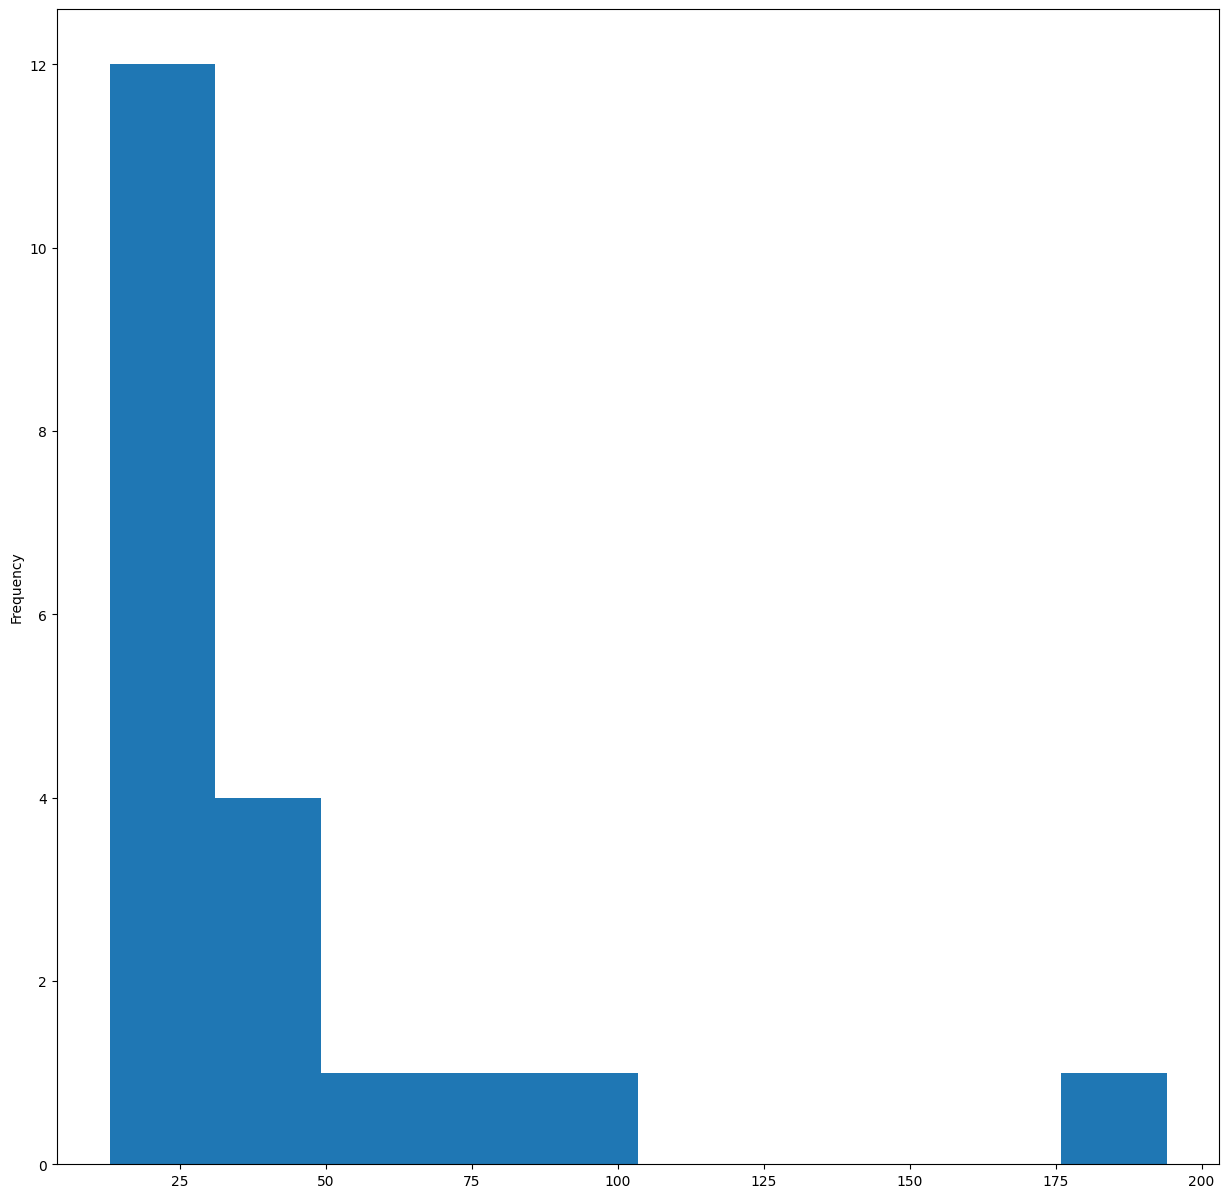

In [22]:
grph.plot(kind='hist', figsize=(15,15))

# The histogram above provides insights into the distribution of frequencies among the states. Specifically, 12 states fall within the range of 10-30, 4 states fall within the range of 30-48, 1 state registers a frequency between 48-100, and another state shows a frequency range of 178-190.

c:\Users\LINK TRADERS LT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LINK TRADERS LT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='loan_amnt', ylabel='total_pymnt'>

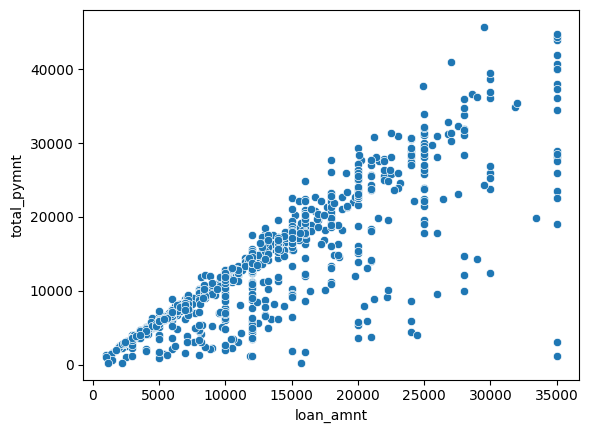

In [23]:
sns.scatterplot(data=data, x="loan_amnt", y="total_pymnt")

# As evident in the scatter plot depicted above, a clear correlation exists between the loan amounts acquired by individuals and the corresponding total repayments necessary to complete these loans, as demonstrated by the best-fit line. Generally, as the loan amounts increase, the total repayments also exhibit an upward trend, albeit with a few exceptions. This graphical representation allows us to calculate the additional amount people had to pay beyond the initial loan sum to settle their loans, a value which can aid in determining the interest rates applied. Notably, the highest loan amount observed is $35,000, while the maximum total payment surpasses $40,000.

c:\Users\LINK TRADERS LT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LINK TRADERS LT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LINK TRADERS LT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


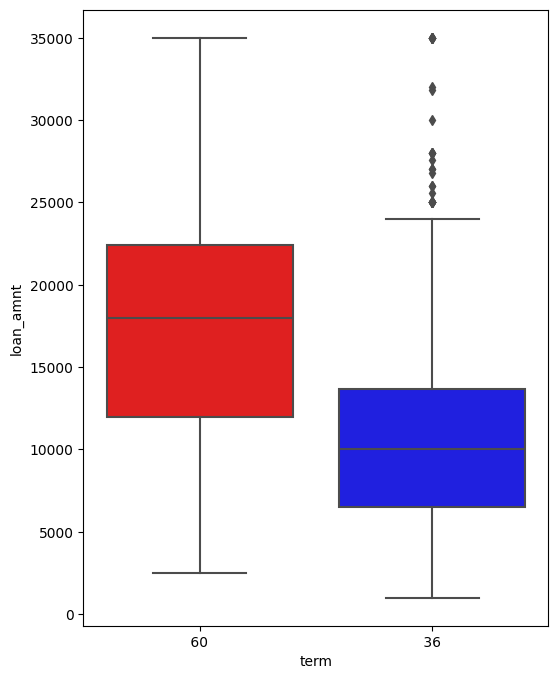

In [24]:
plt.figure(figsize=(6,8))
colors = ['red', 'blue']
sns.boxplot(data =data, x='term', y='loan_amnt',palette=colors)
plt.show()

# However, there are exceptions to this trend. For instance, the highest loan amount of $35,000 is an outlier in the graph and was repaid in 36 months. The median repayment amount for loans spanning 60 months is approximately $18,000, while it stands at $10,000 for loans with a 36-month repayment period. Interestingly, even loans as low as $1,000 were successfully repaid within 36 months. In summary, we can deduce that there is a general tendency for loans with larger amounts to require more time for repayment, although exceptions exist, as demonstrated by the outlier representing the $35,000 loan repaid in 36 months

In [36]:
data = data.drop(columns=[ 'emp_title',"id",	"member_id","home_ownership","last_credit_pull_d",	"application_type", "last_pymnt_d",	"last_pymnt_amnt", "mths_since_last_delinq","mths_since_last_record","application_type","initial_list_status","verification_status","collection_recovery_fee","total_rec_prncp","recoveries","total_rec_int","initial_list_status","total_pymnt_inv","total_rec_late_fee","revol_util","funded_amnt_inv","open_acc",	"out_prncp","out_prncp_inv","pub_rec","revol_bal","title","addr_state",	"dti"	,"delinq_2yrs",	"earliest_cr_line"	,"inq_last_6mths"])

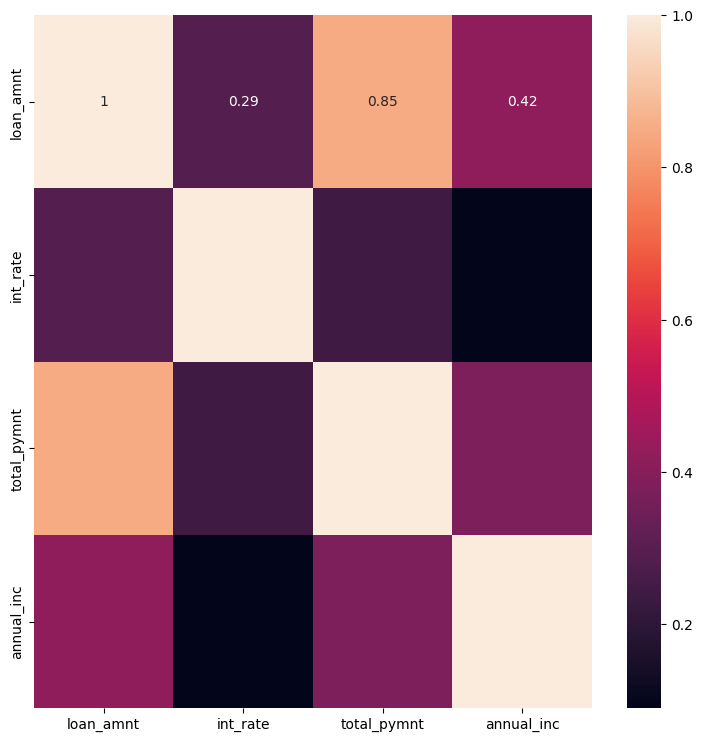

In [39]:
# plt.figure(figsize = (9,9))
# sns.heatmap(round(data.corr(),2),annot=True)



numeric_columns = ['loan_amnt', 'int_rate', 'total_pymnt', 'annual_inc']  # Replace with your actual column names

# Select only the numeric columns from your DataFrame
numeric_data = data[numeric_columns]

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(round(correlation_matrix, 2), annot=True)
plt.show()

In [31]:
data.head(20)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,loan_status,pymnt_plan,purpose,zip_code,total_acc,total_pymnt
1,2500,2500,60,15.27,59.83,C,C4,1.0,30000.00,Dec-11,Bad,n,car,309xx,4,1008.710000
3,10000,10000,36,13.49,339.31,C,C1,10.0,49200.00,Dec-11,Good,n,other,917xx,37,12226.302210
4,3000,3000,60,12.69,67.79,B,B5,1.0,80000.00,Dec-11,Good,n,other,972xx,38,3242.170000
5,5000,5000,36,7.90,156.46,A,A4,3.0,36000.00,Dec-11,Good,n,wedding,852xx,12,5631.377753
6,7000,7000,60,15.96,170.08,C,C5,8.0,47004.00,Dec-11,Good,n,debt_consolidation,280xx,11,8136.840000
7,3000,3000,36,18.64,109.43,E,E1,9.0,48000.00,Dec-11,Good,n,car,900xx,4,3938.144334
9,5375,5375,60,12.69,121.45,B,B5,1.0,15000.00,Dec-11,Bad,n,other,774xx,3,1476.190000
10,6500,6500,60,14.65,153.45,C,C3,5.0,72000.00,Dec-11,Good,n,debt_consolidation,853xx,23,7677.520000
11,12000,12000,36,12.69,402.54,B,B5,10.0,75000.00,Dec-11,Good,n,debt_consolidation,913xx,34,13943.080000
12,9000,9000,36,13.49,305.38,C,C1,1.0,30000.00,Dec-11,Bad,n,debt_consolidation,245xx,9,2270.700000


# The heatmap displayed above reveals several key relationships within the dataset. It's apparent that the interest rate exhibits a bad relation with loan amount. Furthermore, there is a bad relationship between interest rate and annual income. Conversely, a positive relation is observed between total payment and loan amount, indicated by a positive gradient. However, when the color is closer to black and not approaching 1, the gradient appears less steep. A value of 1 signifies a perfectly proportional relationship, and as the color darkens, the gradient becomes less pronounced.